# Neural network
Neural networks can have different uses. Let’s see an example for some of them. 
At this point do not worry to get good performance, focus more on understanding of the parameters and the possibilities for the architecture of the network.
- Prediction: predict SALES and compare with the regression example. Use a Multilayer Perceptron to make the prediction. See different combinations of amount of nodes and layers, plot the actual vs predicted values.   

- Classification: take DEALSIZE as the target variable and perform a neural network to make the classification.  In this case, also use a Multilayer Perceptron 
- Convolutional Neural Network: design and evaluate a CNN for classifying images.


## Regression example: predict SALES

1. Load cleaned_data.csv into a csv
2. Divide dataframe into X and y (SALES is the target variable)
3. Split the data into test and training sets using model_selection
4. use MLPRegressor to predict
5. Plot actual vs predicted values


In [3]:
#imports
import pandas as pd
from sklearn import linear_model
from sklearn import model_selection
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler 
from matplotlib import pyplot as plt
import numpy as np

#load dataset
df = pd.read_csv("data/cleaned_data.csv")
#split the dataframe X - predictors and y - target
X = df.drop('SALES', axis=1)
y = df['SALES']
#split dataset into test/train 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=20) 
#create network
predictors = len(X.columns)
clf = MLPRegressor(solver='adam', alpha=0.0001, activation = 'relu',
                   hidden_layer_sizes=(int((predictors +1)*(2/3)* predictors),int(predictors/2),), 
                   random_state=1)

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(clf.score(X_test, y_test))

fig, ax = plt.subplots()
ax.plot(y_test.to_numpy(), color = 'blue')
ax.plot(predictions, color = 'orange')
ax.legend(['Actual', 'Predicted'])
plt.show()

0.7956158097383902


<Figure size 640x480 with 1 Axes>

## Classification example: Classify DEALSIZE

1. Load cleaned_data.csv into a csv
2. Divide dataframe into X and y (DEALSIZE is the target variable)
3. Split the data into test and training sets using model_selection
4. use MLPClassifier to predict
5. Create a dataframe that contains the actual and the predicted values 

In [6]:
#classify DEALSIZE
from sklearn.neural_network import MLPClassifier
df = pd.read_csv("data/dummies.csv")
print(df['DEALSIZE'].unique())
X = df.drop('DEALSIZE', axis=1)
y = df['DEALSIZE']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=20) 

#create network
predictors = len(X.columns)
clf = MLPClassifier(solver='adam', alpha=0.0001, activation = 'relu',
                   hidden_layer_sizes=(int((predictors +1)*(2/3)* predictors),int(predictors/2),), 
                   random_state=1)

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(clf.score(X_test, y_test))

from matplotlib import pyplot as plt
import numpy as np
df_p = pd.DataFrame()
df_p['Actual'] = y_test
df_p['Predicted'] = predictions
df_p.head()

[0 1 2]
0.9454545454545454


,Actual,Predicted
766,0,0
1050,1,1
255,1,1
826,1,1
1730,0,0


### Confusion matrix
Show the confusion matrix for the classification

In [9]:
#show the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=[0,1,2]) #'Small','Medium','Large'

array([[243,   0,   0],
       [  0, 277,   0],
       [  0,  30,   0]])

Stratify the sample to get a better training set and see how it improves the accuracy  

In [12]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=20, stratify=y)
clf = MLPClassifier(solver='adam', alpha=0.0001, activation = 'relu',
                   hidden_layer_sizes=(int((predictors +1)*(2/3)* predictors),int(predictors/2),), 
                   random_state=1)

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(clf.score(X_test, y_test))

0.9963636363636363


## Convolutional Neural Networks

This example is for convolutional neural networks. The idea is to create a neural network to classify images using the  datasets.cifar10. 

1. Load the dataset into a the train and test sets
2. Show shape of training and testing sets
3. Show some images from training and testing sets, print the class associeted with each image
4. Scale the data
5. Create a model
6. Compile and fit the model 

training: (50000, 32, 32, 3) (50000, 1)
testing: (10000, 32, 32, 3) (10000, 1)


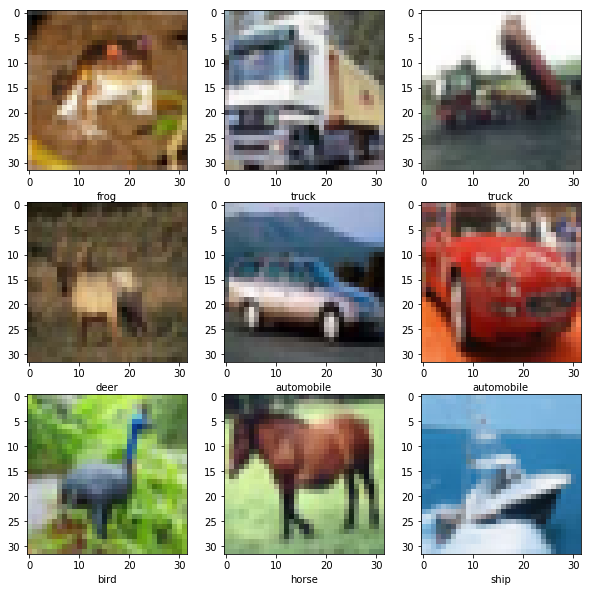

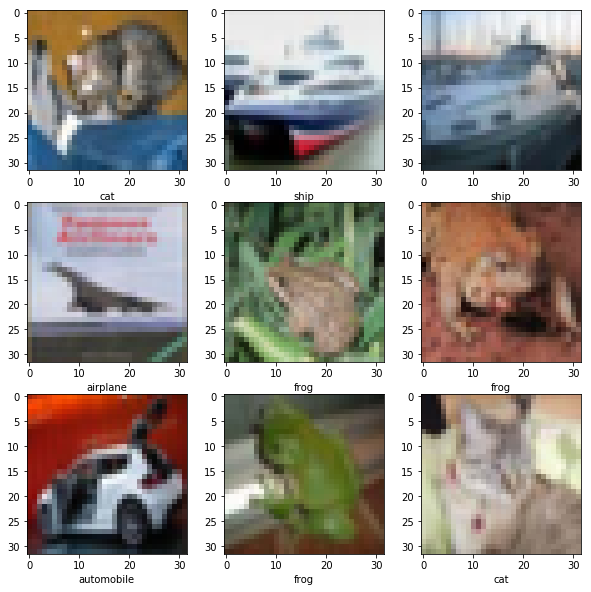

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                6

In [15]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras import datasets, models
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

#load data
(train_X, train_Y), (test_X, test_Y) = datasets.cifar10.load_data()

#show shape of training and testing sets
print('training:', train_X.shape, train_Y.shape) 
#training: (50000, 32, 32, 3) (50000, 1) -> it means that there are 50000 images.
print('testing:', test_X.shape, test_Y.shape) 
#testing: (10000, 32, 32, 3) (10000, 1) -> -> it means that there are 10000 images.
#show some images from training and testing sets, print the class associeted with each image
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(train_X[i,:,:])
    plt.xlabel(classes[train_Y[i][0]])
plt.show()
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[i,:,:])
    plt.xlabel(classes[test_Y[i][0]])
plt.show()

#scale data
#pixels values are between 0 and 255 -> divide by 255 to scale data between 0 and 1
train_X = train_X / 255
test_X = test_X / 255

#create output layer with n nodes and softmax function, (n=#classes). 
output_layer = Dense(len(classes), activation='softmax')

#create the model
#use stack of convolutional layer 2d and pooling layer 
#Normally the pattern: 
#[CONV->ReLU->Pool->CONV->ReLU->Pool->FC->Softmax_loss(during train)] is quite commom.
model = models.Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
print(model.summary())
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=10, 
                    validation_data=(test_X, test_Y))


Evaluate the model and plot the errors 

0.6807


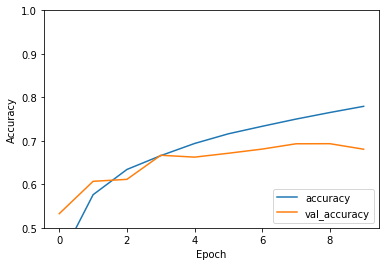

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
loss, acc = model.evaluate(test_X,  test_Y, verbose=0)
print(acc)